In [32]:
#Reading the downloaded file by giving its path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math
import sklearn

data = pd.read_csv("C:/Users/mayur/Downloads/shootings.csv")

data


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [33]:
#Removing duplicate values (Assuming that no 2 person can have the same full names)

ll=list(data.name)

for i in range(len(ll)):
        if ll.count(ll[i])!=1:
            data.drop(index=i,inplace=True)        

data.reset_index(drop=True,inplace=True)
data.id=data.index 
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4829,4829,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4830,4830,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4831,4831,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4832,4832,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [34]:
#Updating invalid values in the df to NaN(NULL)
data = data.replace({
        'armed':'unknown',
        'threat_level':'undetermined',
        'arms_category':'Unknown'
    },np.NaN)

data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4829,4829,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4830,4830,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4831,4831,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4832,4832,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [35]:
data.isnull().any().any()

True

In [36]:
#Deleting rows with more than 2 columns equal to NaN (NULL)

df = data.dropna(thresh=13)
df.reset_index(drop=True,inplace=True) 
df.id=df.index
df

c:\python\python385\lib\site-packages\pandas\core\generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,4732,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4733,4733,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4734,4734,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4735,4735,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [37]:
#Inserting data which were empty with values present adjacent to it(Mathematical operations like mean can't be performed on strings)
while(df.isnull().any().any()):
    df=df.fillna(method='ffill',limit=1)
    df=df.fillna(method='bfill',limit=1)
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,4732,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4733,4733,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4734,4734,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4735,4735,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [38]:
#Checking number of distinct values in each column
df.apply(lambda x: len(set(list(x)))) 

id                         4737
name                       4737
date                       1770
manner_of_death               2
armed                        88
age                          76
gender                        2
race                          6
city                       2230
state                        51
signs_of_mental_illness       2
threat_level                  2
flee                          4
body_camera                   2
arms_category                11
dtype: int64

In [39]:
#Capitalizing and removing irregularities (Takes some time to run) 
for i in df.manner_of_death:
        df.manner_of_death.replace(i,i.capitalize(),inplace=True)
        
for i in df.armed:
        df.armed.replace(i,i.title(),inplace=True)
        
for i in df.arms_category:
        df.arms_category.replace(i,i.capitalize(),inplace=True)        
        
for i in df.threat_level:
        df.threat_level.replace(i,i.capitalize(),inplace=True)

for i in df.name:
        df.name.replace(i,i.title(),inplace=True)        
        
for i in df.city:
        df.city.replace(i,i.title(),inplace=True)        
        
for i in df.state:
        df.state.replace(i,i.upper(),inplace=True)
        
for i in df.race:
        df.race.replace(i,i.title(),inplace=True)
        
for i in df.gender:
        df.gender.replace(i,i.upper(),inplace=True)
        
for i in df.flee:
        df.flee.replace(i,i.capitalize(),inplace=True)

df.reset_index(drop=True,inplace=True)
df.id=df.index       
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,0,Tim Elliot,2015-01-02,Shot,Gun,53.0,M,Asian,Shelton,WA,True,Attack,Not fleeing,False,Guns
1,1,Lewis Lee Lembke,2015-01-02,Shot,Gun,47.0,M,White,Aloha,OR,False,Attack,Not fleeing,False,Guns
2,2,John Paul Quintero,2015-01-03,Shot and tasered,Unarmed,23.0,M,Hispanic,Wichita,KS,False,Other,Not fleeing,False,Unarmed
3,3,Matthew Hoffman,2015-01-04,Shot,Toy Weapon,32.0,M,White,San Francisco,CA,True,Attack,Not fleeing,False,Other unusual objects
4,4,Michael Rodriguez,2015-01-04,Shot,Nail Gun,39.0,M,Hispanic,Evans,CO,False,Attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,4732,Rayshard Brooks,2020-06-12,Shot,Taser,27.0,M,Black,Atlanta,GA,False,Attack,Foot,True,Electrical devices
4733,4733,Caine Van Pelt,2020-06-12,Shot,Gun,23.0,M,Black,Crown Point,IN,False,Attack,Car,False,Guns
4734,4734,Hannah Fizer,2020-06-13,Shot,Unarmed,25.0,F,White,Sedalia,MO,False,Other,Not fleeing,False,Unarmed
4735,4735,William Slyter,2020-06-13,Shot,Gun,22.0,M,White,Kansas City,MO,False,Other,Other,False,Guns


In [40]:
#Updating date and adding columns
df["date"] = pd.to_datetime(df["date"])
df['year'] = df['date'].dt.year
df['total_days']=(df["date"]-df["date"][0])
ll=list(df['total_days'])
dll=list()
for i in ll:
    dll.append((int)((str)(i)[0:len((str)(i))-14]))
df['total_days']=dll
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,total_days
0,0,Tim Elliot,2015-01-02,Shot,Gun,53.0,M,Asian,Shelton,WA,True,Attack,Not fleeing,False,Guns,2015,0
1,1,Lewis Lee Lembke,2015-01-02,Shot,Gun,47.0,M,White,Aloha,OR,False,Attack,Not fleeing,False,Guns,2015,0
2,2,John Paul Quintero,2015-01-03,Shot and tasered,Unarmed,23.0,M,Hispanic,Wichita,KS,False,Other,Not fleeing,False,Unarmed,2015,1
3,3,Matthew Hoffman,2015-01-04,Shot,Toy Weapon,32.0,M,White,San Francisco,CA,True,Attack,Not fleeing,False,Other unusual objects,2015,2
4,4,Michael Rodriguez,2015-01-04,Shot,Nail Gun,39.0,M,Hispanic,Evans,CO,False,Attack,Not fleeing,False,Piercing objects,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,4732,Rayshard Brooks,2020-06-12,Shot,Taser,27.0,M,Black,Atlanta,GA,False,Attack,Foot,True,Electrical devices,2020,1988
4733,4733,Caine Van Pelt,2020-06-12,Shot,Gun,23.0,M,Black,Crown Point,IN,False,Attack,Car,False,Guns,2020,1988
4734,4734,Hannah Fizer,2020-06-13,Shot,Unarmed,25.0,F,White,Sedalia,MO,False,Other,Not fleeing,False,Unarmed,2020,1989
4735,4735,William Slyter,2020-06-13,Shot,Gun,22.0,M,White,Kansas City,MO,False,Other,Other,False,Guns,2020,1989


{'whiskers': [<matplotlib.lines.Line2D at 0x1121418>,
 'caps': [<matplotlib.lines.Line2D at 0x1121790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e455940>],
 'medians': [<matplotlib.lines.Line2D at 0x1121af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1121ca0>],
 'means': []}

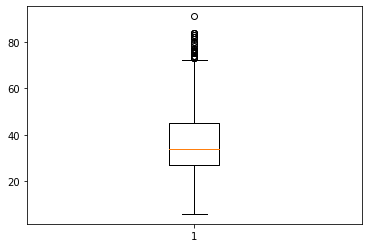

In [41]:
#BOX PLOT Before
plt.boxplot(df.age)

In [42]:
#Removing OUTLIERS

from numpy import percentile
Q=percentile(df.age,[25,50,75])
    
#FOR AGE
iqr=Q[2]-Q[0]
mini=Q[0]-1.5*iqr
maxi=iqr*1.5+Q[2]

count=0
for i in df.age:
        if i<mini or i>maxi:
            df.drop(index=count,inplace=True)
        count+=1
        
df.reset_index(drop=True,inplace=True) 
        
#FOR YEAR
Q=percentile(df.year,[25,50,75])

iqr=Q[2]-Q[0]
mini=Q[0]-1.5*iqr
maxi=iqr*1.5+Q[2]

count=0
for i in df.year:
        if i<mini or i>maxi:
            df.drop(index=count,inplace=True)
        count+=1
        
df.reset_index(drop=True,inplace=True)         

#FOR ID
Q=percentile(df.id,[25,50,75])

ll=list(df.id)
iqr=Q[2]-Q[0]
mini=Q[0]-1.5*iqr
maxi=iqr*1.5+Q[2]

for i in range(len(ll)):
        if ll[i]<mini or ll[i]>maxi:
            df.drop(index=i,inplace=True)
             
df.reset_index(drop=True,inplace=True)
df.id=df.index
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,total_days
0,0,Tim Elliot,2015-01-02,Shot,Gun,53.0,M,Asian,Shelton,WA,True,Attack,Not fleeing,False,Guns,2015,0
1,1,Lewis Lee Lembke,2015-01-02,Shot,Gun,47.0,M,White,Aloha,OR,False,Attack,Not fleeing,False,Guns,2015,0
2,2,John Paul Quintero,2015-01-03,Shot and tasered,Unarmed,23.0,M,Hispanic,Wichita,KS,False,Other,Not fleeing,False,Unarmed,2015,1
3,3,Matthew Hoffman,2015-01-04,Shot,Toy Weapon,32.0,M,White,San Francisco,CA,True,Attack,Not fleeing,False,Other unusual objects,2015,2
4,4,Michael Rodriguez,2015-01-04,Shot,Nail Gun,39.0,M,Hispanic,Evans,CO,False,Attack,Not fleeing,False,Piercing objects,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4696,4696,Rayshard Brooks,2020-06-12,Shot,Taser,27.0,M,Black,Atlanta,GA,False,Attack,Foot,True,Electrical devices,2020,1988
4697,4697,Caine Van Pelt,2020-06-12,Shot,Gun,23.0,M,Black,Crown Point,IN,False,Attack,Car,False,Guns,2020,1988
4698,4698,Hannah Fizer,2020-06-13,Shot,Unarmed,25.0,F,White,Sedalia,MO,False,Other,Not fleeing,False,Unarmed,2020,1989
4699,4699,William Slyter,2020-06-13,Shot,Gun,22.0,M,White,Kansas City,MO,False,Other,Other,False,Guns,2020,1989


TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

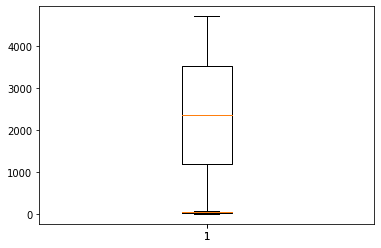

In [65]:
#BOX PLOT after
plt.boxplot(df.age)

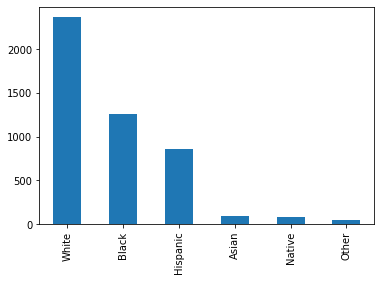

In [43]:
#BAR GRAPH
df.race.value_counts().plot(kind='bar')
plt.show()

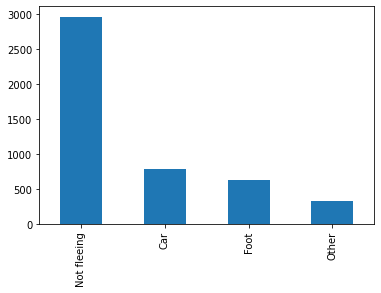

In [44]:
#BAR GRAPH
df.flee.value_counts().plot(kind='bar')
plt.show()

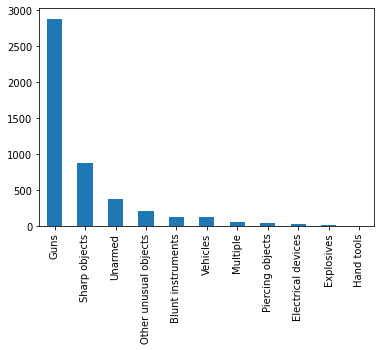

In [45]:
#BAR GRAPH
df.arms_category.value_counts().plot(kind='bar')
plt.show()

In [46]:
dd=pd.DataFrame(df)
dd

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,total_days
0,0,Tim Elliot,2015-01-02,Shot,Gun,53.0,M,Asian,Shelton,WA,True,Attack,Not fleeing,False,Guns,2015,0
1,1,Lewis Lee Lembke,2015-01-02,Shot,Gun,47.0,M,White,Aloha,OR,False,Attack,Not fleeing,False,Guns,2015,0
2,2,John Paul Quintero,2015-01-03,Shot and tasered,Unarmed,23.0,M,Hispanic,Wichita,KS,False,Other,Not fleeing,False,Unarmed,2015,1
3,3,Matthew Hoffman,2015-01-04,Shot,Toy Weapon,32.0,M,White,San Francisco,CA,True,Attack,Not fleeing,False,Other unusual objects,2015,2
4,4,Michael Rodriguez,2015-01-04,Shot,Nail Gun,39.0,M,Hispanic,Evans,CO,False,Attack,Not fleeing,False,Piercing objects,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4696,4696,Rayshard Brooks,2020-06-12,Shot,Taser,27.0,M,Black,Atlanta,GA,False,Attack,Foot,True,Electrical devices,2020,1988
4697,4697,Caine Van Pelt,2020-06-12,Shot,Gun,23.0,M,Black,Crown Point,IN,False,Attack,Car,False,Guns,2020,1988
4698,4698,Hannah Fizer,2020-06-13,Shot,Unarmed,25.0,F,White,Sedalia,MO,False,Other,Not fleeing,False,Unarmed,2020,1989
4699,4699,William Slyter,2020-06-13,Shot,Gun,22.0,M,White,Kansas City,MO,False,Other,Other,False,Guns,2020,1989


<AxesSubplot:xlabel='gender', ylabel='age'>

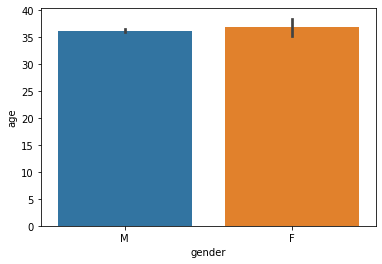

In [47]:
#BAR GRAPH
sns.barplot(x='gender',y='age',data=dd)


<AxesSubplot:xlabel='race', ylabel='total_days'>

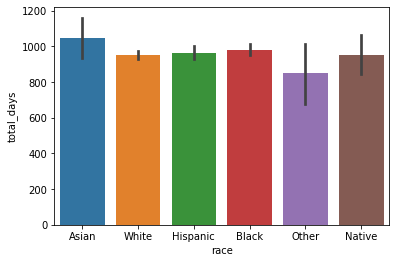

In [48]:
#BAR GRAPH
sns.barplot(x='race',y='total_days',data=dd)

<AxesSubplot:>

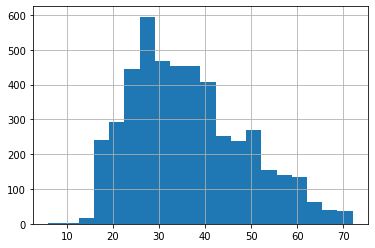

In [49]:
#Histogram
df['age'].hist(bins=20)

c:\python\python385\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

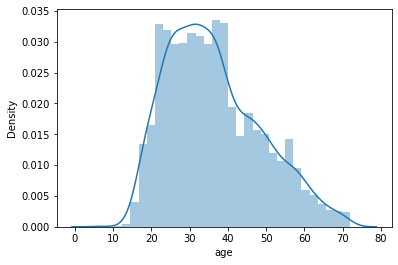

In [50]:
#Density Curve
sns.distplot(df.age)

<AxesSubplot:xlabel='total_days', ylabel='age'>

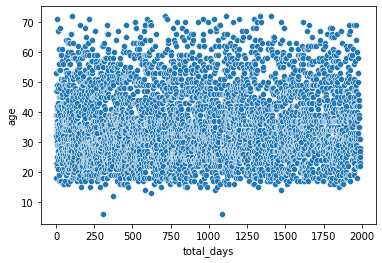

In [51]:
#Scatter plot
sns.scatterplot(x='total_days',y='age',data=dd)

In [88]:
#Mean and Variance for each column
print("Mean:\n\n",df.loc[:,('id','age','total_days','year')].mean())
print("Variance:\n",df.loc[:,('id','age','total_days','year')].var())

Mean:

 id            2350.000000
age             36.267794
total_days     961.409275
year          2017.178685
dtype: float64
Variance:
 id            1.842008e+06
age           1.500614e+02
total_days    3.300861e+05
year          2.508065e+00
dtype: float64


In [53]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
#nor=df
nor=df.copy()

nor[['id','age','total_days','year']]=(scaling.fit_transform(df[['id','age','total_days','year']]))

nor


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,total_days
0,0.000000,Tim Elliot,2015-01-02,Shot,Gun,0.712121,M,Asian,Shelton,WA,True,Attack,Not fleeing,False,Guns,0.0,0.000000
1,0.000213,Lewis Lee Lembke,2015-01-02,Shot,Gun,0.621212,M,White,Aloha,OR,False,Attack,Not fleeing,False,Guns,0.0,0.000000
2,0.000426,John Paul Quintero,2015-01-03,Shot and tasered,Unarmed,0.257576,M,Hispanic,Wichita,KS,False,Other,Not fleeing,False,Unarmed,0.0,0.000502
3,0.000638,Matthew Hoffman,2015-01-04,Shot,Toy Weapon,0.393939,M,White,San Francisco,CA,True,Attack,Not fleeing,False,Other unusual objects,0.0,0.001005
4,0.000851,Michael Rodriguez,2015-01-04,Shot,Nail Gun,0.500000,M,Hispanic,Evans,CO,False,Attack,Not fleeing,False,Piercing objects,0.0,0.001005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4696,0.999149,Rayshard Brooks,2020-06-12,Shot,Taser,0.318182,M,Black,Atlanta,GA,False,Attack,Foot,True,Electrical devices,1.0,0.998493
4697,0.999362,Caine Van Pelt,2020-06-12,Shot,Gun,0.257576,M,Black,Crown Point,IN,False,Attack,Car,False,Guns,1.0,0.998493
4698,0.999574,Hannah Fizer,2020-06-13,Shot,Unarmed,0.287879,F,White,Sedalia,MO,False,Other,Not fleeing,False,Unarmed,1.0,0.998995
4699,0.999787,William Slyter,2020-06-13,Shot,Gun,0.242424,M,White,Kansas City,MO,False,Other,Other,False,Guns,1.0,0.998995


<AxesSubplot:>

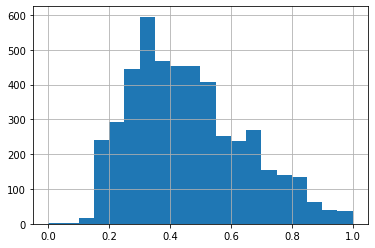

In [66]:
#Histogram (Normalization)
nor['age'].hist(bins=20)

In [55]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
stan=df.copy()
stan[['id','age','total_days','year']]=(scaling.fit_transform(df[['id','age','total_days','year']]))
stan

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,total_days
0,-1.731682,Tim Elliot,2015-01-02,Shot,Gun,1.366045,M,Asian,Shelton,WA,True,Attack,Not fleeing,False,Guns,-1.375851,-1.673558
1,-1.730946,Lewis Lee Lembke,2015-01-02,Shot,Gun,0.876195,M,White,Aloha,OR,False,Attack,Not fleeing,False,Guns,-1.375851,-1.673558
2,-1.730209,John Paul Quintero,2015-01-03,Shot and tasered,Unarmed,-1.083204,M,Hispanic,Wichita,KS,False,Other,Not fleeing,False,Unarmed,-1.375851,-1.671818
3,-1.729472,Matthew Hoffman,2015-01-04,Shot,Toy Weapon,-0.348430,M,White,San Francisco,CA,True,Attack,Not fleeing,False,Other unusual objects,-1.375851,-1.670077
4,-1.728735,Michael Rodriguez,2015-01-04,Shot,Nail Gun,0.223062,M,Hispanic,Evans,CO,False,Attack,Not fleeing,False,Piercing objects,-1.375851,-1.670077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4696,1.728735,Rayshard Brooks,2020-06-12,Shot,Taser,-0.756638,M,Black,Atlanta,GA,False,Attack,Foot,True,Electrical devices,1.781674,1.787022
4697,1.729472,Caine Van Pelt,2020-06-12,Shot,Gun,-1.083204,M,Black,Crown Point,IN,False,Attack,Car,False,Guns,1.781674,1.787022
4698,1.730209,Hannah Fizer,2020-06-13,Shot,Unarmed,-0.919921,F,White,Sedalia,MO,False,Other,Not fleeing,False,Unarmed,1.781674,1.788763
4699,1.730946,William Slyter,2020-06-13,Shot,Gun,-1.164846,M,White,Kansas City,MO,False,Other,Other,False,Guns,1.781674,1.788763


c:\python\python385\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

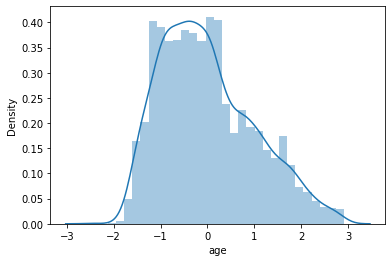

In [56]:
#Density Curve (Standardization)
sns.distplot(stan.age)

In [57]:
#Hypothesis testing
import scipy.stats
from scipy.stats import norm
import numpy as np
import math
from math import sqrt
total_deaths =len(df)
black_deaths=0
for i in df.race:
    if i=='Black':
        black_deaths+=1

p0=0.5
p=black_deaths/total_deaths
Z=(p-p0)/(sqrt(p0*(1-p0)/total_deaths))
print("H0:The claim that more than 50% of the cases are from the black community is a myth")
print("H1:The claim that more than 50% of the cases are from the black community is true and Racism exists")
print("Z =",Z)
if Z<=0:
    print("Null Hypothesis H0 is supported")
    print("The fact that racism exists in this case is a myth")
else:
    print("Null Hypothesis H0 is rejected")
    print("Racism exists in this case")
P=scipy.stats.norm.sf(abs(Z))*100.0
print("The value of P was found to be ",P,"%")


H0:The claim that more than 50% of the cases are from the black community is a myth
H1:The claim that more than 50% of the cases are from the black community is true and Racism exists
Z = -31.86811059807016
Null Hypothesis H0 is supported
The fact that racism exists in this case is a myth
The value of P was found to be  3.694009918524293e-221 %


In [62]:
df.describe()

,id,age,year,total_days
count,4701.000000,4701.000000,4701.000000,4701.000000
mean,2350.000000,36.267794,2017.178685,961.409275
std,1357.206138,12.249955,1.583687,574.531204
min,0.000000,6.000000,2015.000000,0.000000
25%,1175.000000,27.000000,2016.000000,453.000000
50%,2350.000000,34.000000,2017.000000,944.000000
75%,3525.000000,45.000000,2019.000000,1461.000000
max,4700.000000,72.000000,2020.000000,1991.000000


In [60]:
#Correlation
cor=df.corr()
cor

,id,age,signs_of_mental_illness,body_camera,year,total_days
id,1.000000,0.017796,-0.087943,0.037628,0.982478,0.999618
age,0.017796,1.000000,0.098813,-0.031996,0.017259,0.017750
signs_of_mental_illness,-0.087943,0.098813,1.000000,0.047949,-0.082991,-0.088355
body_camera,0.037628,-0.031996,0.047949,1.000000,0.034092,0.036849
year,0.982478,0.017259,-0.082991,0.034092,1.000000,0.983323
total_days,0.999618,0.017750,-0.088355,0.036849,0.983323,1.000000


<AxesSubplot:>

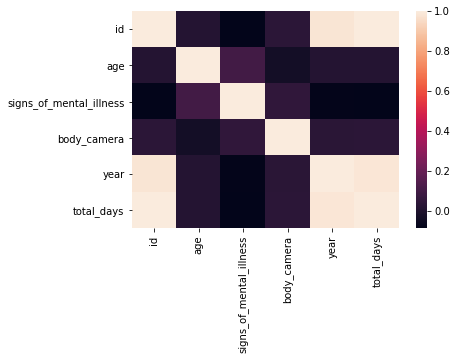

In [61]:
#heatmap
sns.heatmap(cor)
